Text(0.5, 1.0, 'Japan COVID19 : Positive rate = 0.097, Severe rate = 0.021, Death rate = 0.034')

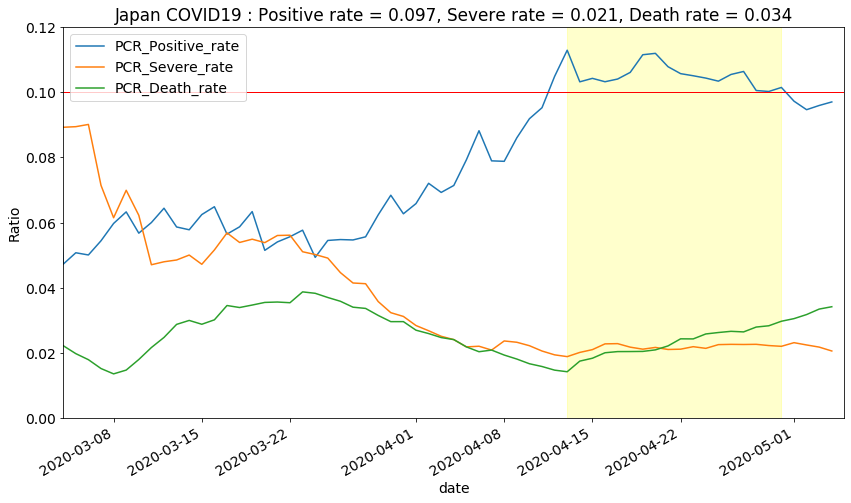

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

'''data'''
df_demo = pd.read_csv("./data/demography.csv") #year-dependent fatality rate
df_pref = pd.read_csv("./data/prefectures.csv") #PCR positive with symptoms, in hospital, discharge, death
df_pref2 = pd.read_csv("./data/prefectures-2.csv") #PCR positive, PCR Total, Positive rate
df_sum = pd.read_csv("./data/summary.csv", parse_dates=[['年', '月', '日']]).rename(columns={'年_月_日': 'date'})
#df_sum#.head()

#Positive Rate
df_sum['PCR_Positive_rate']= df_sum['PCR検査陽性者'] / df_sum['PCR検査実施人数']
#Severe Rate
df_sum['PCR_Severe_rate'] = df_sum['人工呼吸器又は集中治療室に入院している者'] / df_sum['PCR検査陽性者']
#Death Rate
df_sum['covid19_death'] = df_sum[['死亡者', '死亡者（突合作業中を含む）']].max(axis=1)
df_sum['PCR_Death_rate'] = df_sum['covid19_death'] / df_sum['PCR検査陽性者']

'''Plot'''
plt.rcParams.update({'font.size': 14})
df_sum.plot(x='date', y=['PCR_Positive_rate','PCR_Severe_rate', 'PCR_Death_rate'], figsize=(14,8))
plt.xlim("2020-03-04","2020-05-05")
plt.ylim(0,0.12)
plt.axhline(y=0.1,color='red', linewidth=1)
plt.axvspan("2020-04-13", "2020-04-30", color='yellow', alpha=0.2)
plt.ylabel('Ratio')
plt.title('Japan COVID19 : Positive rate = {:.3}, Severe rate = {:.2}, Death rate = {:.2}'.format(df_sum['PCR_Positive_rate'].iloc[-1], 
                                                                      df_sum['PCR_Severe_rate'].iloc[-1], 
                                                                                          df_sum['PCR_Death_rate'].iloc[-1]))

(18359.0, 18413)

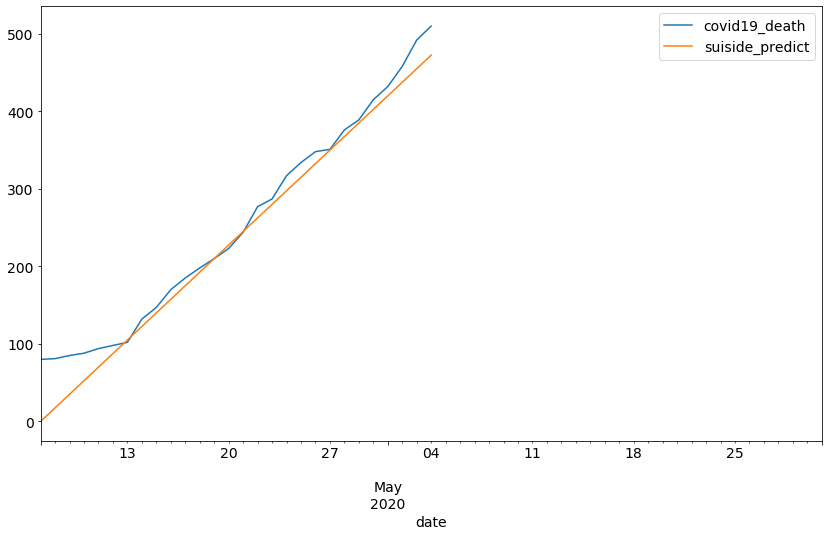

In [40]:
sui = np.arange(0, 17.5*28, 17.5)
df_emergency = df_sum[df_sum['date'] > '2020-04-06']
df_emergency['suiside_predict'] = pd.DataFrame(sui).values
df_emergency.plot(x='date', y=['covid19_death','suiside_predict'], figsize=(14,8))
plt.xlim(xmax="2020-05-31")